In [1]:
pathtorepo = "C:\\Users\\Alex\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems

using CairoMakie

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
@inbounds U(y, p) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
@inbounds σ(x, p) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
@inbounds g(E, x, y, p, U_) = log( 1.0 + exp( (p[5] * U_ * x * E + p[11]  ) / (p[1]) ) )

@inbounds function TM(u, p, t)
    
    U_ = U(u[3], p)
    
    du1 = (-u[1] + p[1] * g(u[1], u[2], u[3], p, U_) ) / p[2]
    du2 = (1.0 - u[2]) / p[3] - U_*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2], p)
    
    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [3]:
t = 1000.0; tt = 1000.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [14]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const U0 = 0.3;  const ΔU0 = 0.305;
const I0 = -1.6;

In [15]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

### Multistability

In [16]:
u0_chaos = SA[3.8398031438626057, 0.8237522227211204, 0.4265960327571268]
ds_chaos = CoupledODEs(TM, u0_chaos, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]
 time:          0.0
 state:         [3.8398031438626057, 0.8237522227211204, 0.4265960327571268]


In [17]:
u0_stable = SA[10.114129259254579, 0.7043935355527935, 0.41019986371663264]
ds_stable = CoupledODEs(TM, u0_stable, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]
 time:          0.0
 state:         [10.114129259254579, 0.7043935355527935, 0.41019986371663264]


In [18]:
tr_chaos, _ = trajectory(ds_chaos, t, Δt = tstep; Ttr = tt)
tr_stable, _ = trajectory(ds_stable, t, Δt = tstep; Ttr = tt);

In [19]:
lb_size = 35; tck_size = 30; dis = 60;

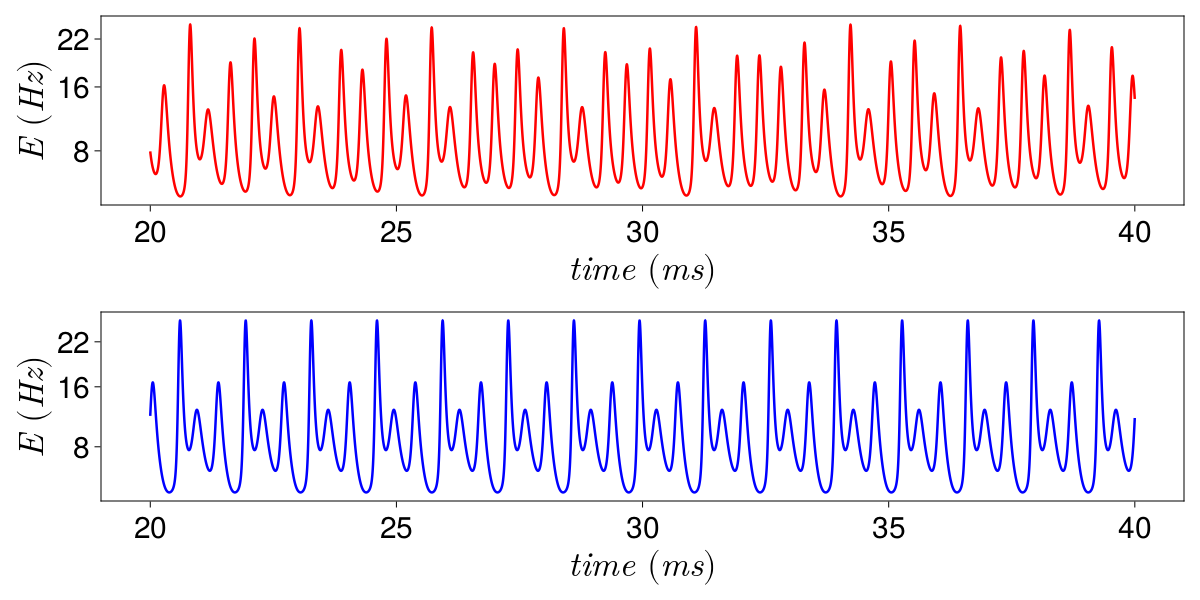

In [20]:
ts, tf = 20000, 40000
f = Figure(resolution = (1200, 600))
axis1 = Axis(f[1, 1], xlabel = L"$time$ $(ms)$", ylabel = L"$E$ $(Hz)$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [8, 16, 22])
axis2 = Axis(f[2, 1], xlabel = L"$time$ $(ms)$", ylabel = L"$E$ $(Hz)$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [8, 16, 22])

lines!(axis1, trange[ts:tf], tr_chaos[ts:tf, 1],  linewidth = 2.5, linestyle = :solid, color = :red)
lines!(axis2, trange[ts:tf], tr_stable[ts:tf, 1], linewidth = 2.5, linestyle = :solid, color = :blue)
f

In [13]:
#save("timeseries_multistab.eps", f)

CairoMakie.Screen{EPS}


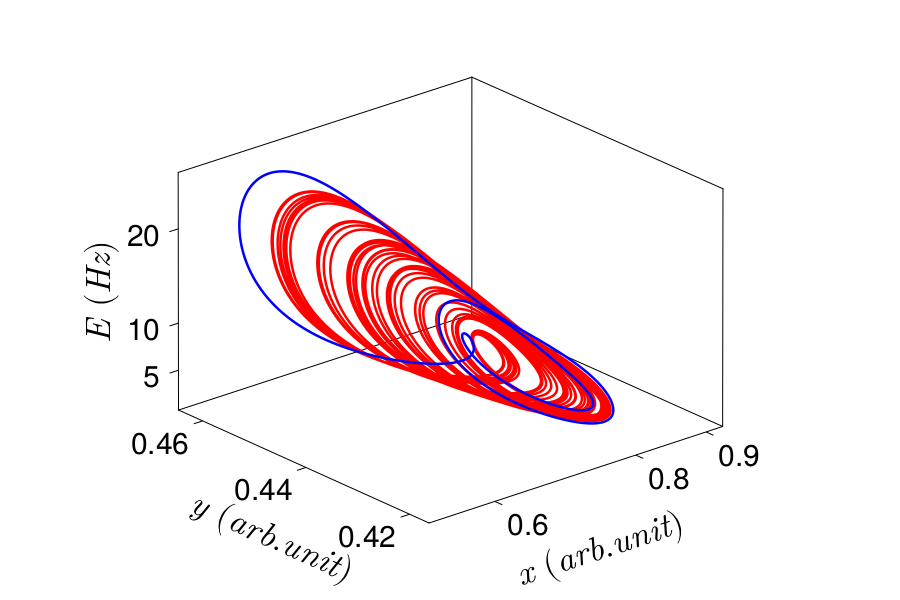

In [21]:
ts, tf = 20000, 40000
idx, idy, idz = 2, 3, 1

f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = L"$x$ $(arb. unit)$", ylabel = L"$y$ $(arb. unit)$", zlabel = L"$E$ $(Hz)$",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                xticks = [0.6 ,0.8, 0.9], yticks = [0.42, 0.44, 0.46], zticks = [5, 10, 20],
                protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

lines!(axis3, tr_chaos[ts:tf, idx], tr_chaos[ts:tf, idy], tr_chaos[ts:tf, idz],
        linewidth = 2.5, linestyle = :solid, color = :red)

lines!(axis3, tr_stable[ts:tf, idx], tr_stable[ts:tf, idy], tr_stable[ts:tf, idz],
        linewidth = 2.5, linestyle = :solid, color = :blue)

#scatter!(axis3, fp[1][2], fp[1][3], fp[1][1], markersize = 8, color = :orange)
f

In [15]:
#save("phase_multistab.eps", f)

CairoMakie.Screen{EPS}
